# Lab 8: Greedy Algorithms

Lab associated with Module 8: Greedy Algorithms

***

In [33]:
# The following lines are used to increase the width of cells to utilize more space on the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [34]:
import numpy as np

In [35]:
import math

In [36]:
from IPython.display import Image
from graphviz import Digraph

## Section 1: Graph Preliminaries
Let us start by implementing our Node and Graph data structure to incorporate weights in the graph

In [37]:
class Node:

    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        self.key = np.inf  # Key to infinity
        self.parent = None  # parent to None for testing

        self.status = "unvisited"
        self.estD = np.inf

    def hasOutNeighbor(self, v):

        if v in self.outNeighbors:
            return True

        return False

    def hasInNeighbor(self, v):

        if v in self.inNeighbors:
            return True

        return False

    def hasNeighbor(self, v):

        if v in self.inNeighbors or v in self.outNeighbors:
            return True

        return False

    def getOutNeighbors(self):

        return self.outNeighbors

    def getInNeighbors(self):

        return self.inNeighbors

    def getOutNeighborsWithWeights(self):

        return self.outNeighbors

    def getInNeighborsWithWeights(self):

        return self.inNeighbors

    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------

    def addOutNeighbor(self,v,wt):

        self.outNeighbors.append((v,wt))

    def addInNeighbor(self,v,wt):

        self.inNeighbors.append((v,wt))


    def __str__(self):

        return str(self.value)

In [38]:
# Insert Graph Class
class Graph:

    def __init__(self):

        self.vertices = []

    def addVertex(self,n):

        self.vertices.append(n)

    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------

    def addDiEdge(self, u, v, wt = 1):

        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)

    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):

        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)


    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):

        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret

    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):

        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):

            if v.hasOutNeighbor(u) and u.hasInNeighbor(v):
                return

            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)

    def __str__(self):

        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

***

### <font color='red'> Activity 1a: Write a greedy algorithm for Activity Selection problem in this week's lab. </font>

## Greedy Activity Selection Problem
- The greedy strategy sorts the activities based on their end times and selects the activity with the earliest end time first.
- It iteratively selects activities that do not overlap with the previously selected ones.
- This approach aims to make a locally optimal choice at each step by selecting the activity that ends earliest, without considering the global picture.

### Aim: Select a maximum number of non-overlapping activities to perform.
- Algorithm has inputs:
    -  activities (list of activities)
    - start_times (list of start time for the activities)
    - end_times (list of end times for the activities)

- The Activity Selection Problem Algorithm uses an empty list to store activities.
- The function zip in python is used to create tuples (end_time, start_time, activitiy) and then sorting based on end times.

## Implementation
1. The first activity in the sorted list is going to be non-overlapping with the others, so its added to selected_activities list.
  - the end_time for this activity is stored in prev_end_time variable.
2. The loop iterates through the remaining activities in the sorted list
  - For each acitvity it checks if start time of the current activity is > = to the prev_end_time (of last selected activity).
  - If true, current activity is considered non-overlapping and added to selected_activities list and pre_end_time updated.

3. The selected_activities list contains all the activities that were selected, the length of this list represents the max number of non-overlapping activities that can be performed in a day!



In [39]:
def activity_selection(activities, start_times, end_times):
  if not activities:  # If there are no activities, return an empty list
    return []

  # Find the total number of activies
  n = len(activities)

  # Create empty list, store selected activities
  selected_activities = []

  # Sort activities (end times)
  # Tracks (start times, activity names)
  sorted_activities = sorted(zip(end_times, start_times, activities))

  # Select first activity (earliest ending activity)
  selected_activities.append(sorted_activities[0][2]) # Add activity to selected list
  prev_end_time = sorted_activities[0][0] #Update previous end time

  # Iterate through the remaining activities
  for i in range(1, n):
    current_activity = sorted_activities[i]
    if current_activity[1] >= prev_end_time:
      #If true, activities start time is after or = to previous end time
      selected_activities.append(current_activity[2]) # Add to selected list
      prev_end_time = current_activity[0] # Update previous end time

  return selected_activities

## Test Cases
- Non-overlapping activities
- Overlapping activities
- All overlapping activities
- No activities
- One Activity

In [40]:
# Time
import time

# Non-overlapping activities
activities1 = ["A", "B", "C", "D"]
start_times1 = [1, 2, 4, 6]
end_times1 = [3, 5, 7, 8]

selected1 = activity_selection(activities1, start_times1, end_times1)
print("Non-Overlapping activities")
print("Selected activities:", selected1)
print("Number of activities:", len(selected1))

Non-Overlapping activities
Selected activities: ['A', 'C']
Number of activities: 2


In [41]:
# Overlapping activities
activities2 = ["A", "B", "C", "D", "E", "F"]
start_times2 = [1, 2, 4, 5, 8, 5]
end_times2 = [3, 4, 6, 7, 9, 9]

selected2 = activity_selection(activities2, start_times2, end_times2)
print("Overlapping activities")
print("Selected activities:", selected2)
print("Number of activities:", len(selected2))

Overlapping activities
Selected activities: ['A', 'C', 'E']
Number of activities: 3


In [42]:
# All overlapping activities
activities3 = ["A", "B", "C", "D"]
start_times3 = [1, 2, 3, 4]
end_times3 = [4, 5, 6, 7]

selected3 = activity_selection(activities3, start_times3, end_times3)
print("All overlapping activities")
print("Selected activities:", selected3)
print("Number of activities:", len(selected3))

All overlapping activities
Selected activities: ['A', 'D']
Number of activities: 2


In [43]:
# No activities
activities4 = []
start_times4 = []
end_times4 = []

selected4 = activity_selection(activities4, start_times4, end_times4)
print("No activities")
print("Selected activities:", selected4)
print("Number of activities:", len(selected4))

No activities
Selected activities: []
Number of activities: 0


In [44]:
# One Activity
activities5 = ["A"]
start_times5 = [1]
end_times5 = [4]

selected5 = activity_selection(activities5, start_times5, end_times5)
print("One activities")
print("Selected activities:", selected5)
print("Number of activities:", len(selected5))

One activities
Selected activities: ['A']
Number of activities: 1


### <font color='red'> Activity 1b: Devise a dynamic programming solution to Activity Selection problem, and see if you get the same results as that of greedy strategy. </font>

## Dynamic Programming Solution - Activity Selection
- This algorithm takes same inputs
- Uses same n variable to store total number of activities.
- Instead of using a list, use an array max_activities of length n, with all values set to 1.
  - Each element of the array will eventually store max number of activities that can be selected.

### DP part
- uses nested loops to fill in the max_activities (array).
- Outerloop iterates over each activity starting at second.
- Inner loop iterates over the activities that follow the current one.
- The overlapping activities are checked if the end time of activity j is < = to the start time of activity i.
  - Ensuring activities don't overlap.
- max_activities[i] and [j + 1] is updated to be the max current value.
  - when array is full use max(max_activities)
  - Finds the max number over non-overlapping activities.
- Reconstructs the list based on max_activities array using correct corresponding activity to selected_activity list.
- Backtracks to find the remaining selected activities by decrementing max_selected, final score is reversed to get correct order and count.

### Difference in results
- When you create overlapping activities, the greedy strategy may not always find the optimal solution.
- Greedy can produce suboptimal results, as it makes locally optimal choices at each step without considering the global picture unlike Dynamic programming solution.


In [45]:
def dp_activity_selection(activities, start_times, end_times):
    n = len(activities)

    # List to store the max number of selected activities
    max_activities = [1] * n

    # max_activities array
    for i in range(1, n):
      for j in range(i):
        if end_times[j] <= start_times[i] and max_activities[i] < max_activities[j] + 1:
          max_activities[i] = max_activities[j] + 1

    # Find max number of activities
    max_selected = max(max_activities)

    # Find selected activities
    selected_activities = [] # Store activities
    idx = max_activities.index(max_selected) # idx is set where last max value is found
    selected_activities.append(activities[idx]) # added to list
    max_selected -= 1 # reduced due to being used

    # Backtrack to find selected activities
    # Runs until there are no more max activities in the list and they are valid
    while max_selected > 0 and idx > 0:
      # Check activities that come before the currently selected activity (idx)
      # Check idx -1 (second last) checking all the way to beginning
      for j in range(idx - 1, -1, -1):
        # Check if activity (j) can be included without overlap in last selected activity (idx)
        # Compare end_times[j] with start_time[idx], the start time of last selected activity
        if end_times[j] <= start_times[idx] and max_activities[j] == max_selected:
          selected_activities.append(activities[j])
          max_selected -= 1 # Reduce by 1 as its confirmed.
          idx = j # Update idx to continue backtrack
          break

    return selected_activities[::-1]  # Reverse the list to get the correct order

##Test Cases
- Non-overlapping activities
- Overlapping activities
- All overlapping activities
- No activities
- One Activity

In [46]:
# Non-overlapping activities
selected_dp_1 = activity_selection(activities1, start_times1, end_times1)
print("Non-Overlapping activities")
print("Selected activities dynamic programming:", selected_dp_1)
print("Number of activities:", len(selected_dp_1))
print("-" * 40)
print()

# Overlapping activities
selected_dp_2 = activity_selection(activities2, start_times2, end_times2)
print("Overlapping activities")
print("Selected activities dynamic programming:", selected_dp_2)
print("Number of activities:", len(selected_dp_2))
print("-" * 40)
print()

# All overlapping activities
selected_dp_3 = activity_selection(activities3, start_times3, end_times3)
print("All overlapping activities")
print("Selected activities dynamic programming:", selected_dp_3)
print("Number of activities:", len(selected_dp_3))
print("-" * 40)
print()

# No activities
selected_dp_4 = activity_selection(activities4, start_times4, end_times4)
print("No activity:")
print("Selected activities dynamic programming:", selected_dp_4)
print("Number of activities:", len(selected_dp_4))
print("-" * 40)
print()

# One activity
selected_dp_5 = activity_selection(activities5, start_times5, end_times5)
print("One activity")
print("Selected activities dynamic programming:", selected_dp_5)
print("Number of activities:", len(selected_dp_5))

Non-Overlapping activities
Selected activities dynamic programming: ['A', 'C']
Number of activities: 2
----------------------------------------

Overlapping activities
Selected activities dynamic programming: ['A', 'C', 'E']
Number of activities: 3
----------------------------------------

All overlapping activities
Selected activities dynamic programming: ['A', 'D']
Number of activities: 2
----------------------------------------

No activity:
Selected activities dynamic programming: []
Number of activities: 0
----------------------------------------

One activity
Selected activities dynamic programming: ['A']
Number of activities: 1


## Time Comparison: Activity Selection & DP Solution
#### Non-overlapping activities
- Greedy Time: 0.000092 seconds
- DP Time: 0.000108 seconds

##### Analysis
- Both DP and Greedy algorithm selects the optimal solution A and C
- Greedy Time is slightly faster then DP time

#### Overlapping activities
- Greedy Time: 0.000063 seconds
- DP Time: 0.000061 seconds

##### Analysis
- Greedy selects A, C, E as solution
- DP selects B, D, E as solution
- Greedy doesn't always find optimal solution
- DP finds optimal solution
- DP is slightly faster, a larger graph would show a bigger difference in time

#### Summary
- Non-overlapping both Greedy and DP create similar results, Greedy is faster
- Overlapping DP more successful then Greedy in finding optimal solution, minimal time difference

In [73]:
# Time Comparison Activity Selection & DP Solution
import time

print("Non-overlapping activities")
# Greedy
start_time = time.time()
selected1 = activity_selection(activities1, start_times1, end_times1)
end_time = time.time()
greedy_time1 = end_time - start_time

# Dynamic Programming Greedy
start_time = time.time()
selected_dp_1 = dp_activity_selection(activities1, start_times1, end_times1)
end_time = time.time()
dp_time1 = end_time - start_time

print(f"Greedy Result: {selected1}")
print(f"Dynamic Programming Result: {selected_dp_1}")
print(f"Greedy Time: {greedy_time1:.6f} seconds")
print(f"Dynamic Programming Time: {dp_time1:.6f} seconds")
print("-" * 40)
print()

print("Overlapping activities")
# Greedy
start_time = time.time()
selected2 = activity_selection(activities2, start_times2, end_times2)
end_time = time.time()
greedy_time2 = end_time - start_time

# Dynamic Programming Greedy
start_time = time.time()
selected_dp_2 = dp_activity_selection(activities2, start_times2, end_times2)
end_time = time.time()
dp_time2 = end_time - start_time

print(f"Greedy Result: {selected2}")
print(f"Dynamic Programming Result: {selected_dp_2}")
print(f"Greedy Time: {greedy_time2:.6f} seconds")
print(f"Dynamic Programming Time: {dp_time2:.6f} seconds")

Non-overlapping activities
Greedy Result: ['A', 'C']
Dynamic Programming Result: ['A', 'C']
Greedy Time: 0.000092 seconds
Dynamic Programming Time: 0.000108 seconds
----------------------------------------

Overlapping activities
Greedy Result: ['A', 'C', 'E']
Dynamic Programming Result: ['B', 'D', 'E']
Greedy Time: 0.000063 seconds
Dynamic Programming Time: 0.000061 seconds


Let us test above function as:

In [48]:
activities = [  "[1,4]","[2,5]","[3,6]","[5,7]","[3,8]","[6,9]","[8,10]","[9,11]","[5,12]","[6,13]","[8,14]","[13,15]" ]
activities_start_time = [  1, 2, 3, 5, 3, 6, 8, 9, 5, 6, 8, 13]
activities_end_time = [  4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15 ]

activityList = dp_activity_selection(activities, activities_start_time, activities_end_time)

print("Solution:", activityList)

Solution: ['[2,5]', '[5,7]', '[9,11]', '[13,15]']


***

###  Prim's Algorithm O(nm)
- For each of n-1 iterations of the while loop
  - maybe go through all the edges
- Greedy algorithm
- Keep track of nodes visited
- Make sure that you do not create a cycle (which would violate your tree property)
- SlowPrim() – the algorithm time complexity if O(nm) inefficient!
- n is the number of vertices
- m is the number of edges in the graph

### slowPrim()
- slowPrim( G = (V,E), starting vertex s ):
  - Let (s,u) be the lightest edge coming out of s.
  - MST = { (s,u) }
  - verticesVisited = { s, u }
  - while |verticesVisited| < |V|:
    - find the lightest edge (x,v) in E so that:
      - x is in verticesVisited
      - v is not in verticesVisited
    - add (x,v) to MST
    - add v to verticesVisited
  - return MST

Graph's Preliminaries

In [49]:
G = Graph()

for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']:
    G.addVertex( Node(i) )

In [50]:
V = G.vertices

#0, 1, 2, 3, 4, 5, 6, 7, 8
#A, B, C, D, E, F, G, H, I

G.addBiEdge( V[0], V[1], 4)

G.addBiEdge( V[0], V[7] , 8)

G.addBiEdge( V[1], V[7], 11)

G.addBiEdge( V[1], V[2], 8)

G.addBiEdge( V[2], V[3], 7)

G.addBiEdge( V[3], V[4], 9)

G.addBiEdge( V[3], V[5], 14 )

G.addBiEdge( V[4], V[5], 10 )

G.addBiEdge( V[2], V[5], 4 )

G.addBiEdge( V[2], V[8], 2 )

G.addBiEdge( V[5], V[6], 2 )

G.addBiEdge( V[6], V[7], 1 )

G.addBiEdge( V[6], V[8], 6 )

G.addBiEdge( V[7], V[8], 7 )


In [51]:
print(G)

Graph with:
	 Vertices:
	A,B,C,D,E,F,G,H,I,
	 Edges:
	(A,(<__main__.Node object at 0x7a31aea4ba30>, 4)) (A,(<__main__.Node object at 0x7a31aea48550>, 8)) (B,(<__main__.Node object at 0x7a31aea4b910>, 4)) (B,(<__main__.Node object at 0x7a31aea48550>, 11)) (B,(<__main__.Node object at 0x7a31aea49b40>, 8)) (C,(<__main__.Node object at 0x7a31aea4ba30>, 8)) (C,(<__main__.Node object at 0x7a31aea494e0>, 7)) (C,(<__main__.Node object at 0x7a31aea49900>, 4)) (C,(<__main__.Node object at 0x7a31aea49570>, 2)) (D,(<__main__.Node object at 0x7a31aea49b40>, 7)) (D,(<__main__.Node object at 0x7a31aea48ca0>, 9)) (D,(<__main__.Node object at 0x7a31aea49900>, 14)) (E,(<__main__.Node object at 0x7a31aea494e0>, 9)) (E,(<__main__.Node object at 0x7a31aea49900>, 10)) (F,(<__main__.Node object at 0x7a31aea494e0>, 14)) (F,(<__main__.Node object at 0x7a31aea48ca0>, 10)) (F,(<__main__.Node object at 0x7a31aea49b40>, 4)) (F,(<__main__.Node object at 0x7a31aea48f70>, 2)) (G,(<__main__.Node object at 0x7a31aea499

This is what we had in the lectures as the slow implementation of Prim's Algorithm

In [52]:
# G is graph
# s is the node to start

def slowPrim(G, s):

    # first, find the lightest edge leaving s
    bestWt = np.inf
    bestu = None

    for u,wt in s.getOutNeighborsWithWeights():

        if wt < bestWt:
            bestWt = wt
            bestu = u

    MST = [ (s, bestu) ]
    verticesVisited = [s,bestu]

    while len(verticesVisited) < len(G.vertices): # danger! this will loop forever if the graph isn't connected...

        # find the lightest edge (x,v) so that x has been visited and v hasn't.
        bestWt = np.inf
        bestv = None
        bestx = None

        for x in verticesVisited:
            for v,wt in x.getOutNeighborsWithWeights():

                if v in verticesVisited:
                    continue

                if wt < bestWt:
                    bestWt = wt
                    bestv = v
                    bestx = x

        MST.append((bestx,bestv))
        verticesVisited.append(bestv)

    return MST

In [53]:
T = slowPrim(G, G.vertices[0])

for x,y in T:
    print(x,y)

A B
A H
H G
G F
F C
C I
C D
D E


Okay, it seems to be working fine, but as we discussed, will be quite slow. Let us see if we can work on the faster version of the code as:

### <font color='red'> Activity 2: In lights of Prim's Algorithm above, write an efficient implementation based on our discussions in the Seminar/Lecture. </font>

## Prims Algorithm O(mlog(n))
- Prim's algorithm is a greedy algorithm used to find the Minimum Spanning Tree (MST) of a connected, undirected graph.
- The MST is a subset of the edges of the graph that forms a tree and includes all the vertices while minimizing the total edge weight.
- Prim's algorithm starts with an initial vertex and grows the MST one vertex at a time by selecting the edge with the smallest weight that connects a vertex in the MST to a vertex outside the MST.
---

##### The algorithm (Prims) starts by initializing a key (distance) and parent for each vertex in the graph.
- Make each node store a value (key) k[x]
- Key makes decision to include node or not in Minimum spanning tree.

The key is initially set to positive infinity to represent that the vertices are not yet in the MST.
- The parent is initially set to None.
- Initialise values (to infinity) for all nodes except root.
  -  Store one more value for each vertex P[x] -> pointing to nearest node on minimum spanning tree.

##### Setting the Key for the Starting Vertex:
- The key of the starting vertex s is set to 0 to make it the first vertex in the MST.

##### Empty MST/  Priority Queue:
- An empty list MST is created to store the edges of the MST.
- A priority_queue is initialized with the vertices of the graph.
- The vertices are sorted based on their keys (initially all infinity), so the starting vertex s is at the top of the priority queue.

##### Loop:
- The algorithm enters a loop that continues until the priority queue is empty.
- Each iteration of the loop, it extracts the vertex u with the smallest key from the priority queue.

##### Adding Edges to MST:
- If u has a parent (i.e., it's not the starting vertex), the edge (u.parent, u) is added to the MST.
- The edge connects a vertex inside the MST to a vertex outside the MST.

##### Updating Keys and Parents:
- The algorithm then examines all neighbors v of vertex u and checks if the edge weight from u to v is smaller than the current key of v.
  - If it is, the key of v is updated with the smaller weight, and the parent of v is set to u.
  - Grows the MST by considering the smallest-weight edges that connect the MST to the remaining vertices.

##### Updating Priority Queue:
- After updating the keys and parents, the priority queue is adjusted to reflect the changes.
- priority_queue ensures that the vertex with the smallest key is always at the front.
- priority_queue empty, the algorithm has constructed the MST, and it returns the list of edges in the MST.

##### Similar to Dijkstra’s algorithm!
- Differences:
1. Keep track of p[v] in order to return a tree at the end
  - But Dijkstra’s can do that too, that’s not a big difference.
2. Instead of d[v] which we update by
  - d[v] = min( d[v], d[u] + w(u,v) )
  - we keep k[v] which we update by
  - k[v] = min( k[v], w(u,v) )

In [54]:
import heapq
def prim(G, w):

  # If graph empty or only one node
  if not G.vertices or len(G.vertices) == 1:
    return []

  # Keys, parents for all vertices
  for v in G.vertices:
    v.key = np.inf
    v.parent = None

    # Starting vertex Key = 0
    w.key = 0

    # Empty MST
    MST = []

    # Priority queue (min-heap) for vertice keys
    priority_queue = G.vertices.copy()
    priority_queue.sort(key=lambda x: x.key)

    while priority_queue:
      # Find vertex smallest key, min distance
      u = priority_queue.pop(0)

      # If parent, add edge (u.parent, u) to the MST
      if u.parent is not None:
        MST.append((u.parent, u))

      # Update keys, parents of u's neighbors
      for v, wt in u.outNeighbors:
        if v in priority_queue and wt < v.key:
          v.key = wt
          v.parent = u

          # Update position of v in queue
          priority_queue.sort(key=lambda x: x.key)

    return MST

## Test Cases
- Simple Graph
- Empty Graph
- Single Vertex
- Disconnected Sections
- Graph Negative Weights
- Graph Duplicate Weights
- Graph Cycle
- Complex Graph
- Time Comparison

Simple Graph Test
A - B
B - C
B - D



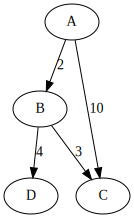

In [71]:
# Simple Graph
G1 = Graph()

for i in ['A', 'B', 'C', 'D']:
  G1.addVertex(Node(i))

V_cycle = G1.vertices
G1.addDiEdge(V_cycle[0], V_cycle[1], 2)
G1.addDiEdge(V_cycle[0], V_cycle[2], 10)
G1.addDiEdge(V_cycle[1], V_cycle[2], 3)
G1.addDiEdge(V_cycle[1], V_cycle[3], 4)

MST = prim(G1, G1.vertices[0]) # Prim

# Print MST
print("Simple Graph Test")
for edge in MST:
  print(f"{edge[0].value} - {edge[1].value}")
print()

# Visual Graph
dot = Digraph()

# Add edges to Graph
dot.edge('A', 'B', label='2')
dot.edge('A', 'C', label='10')
dot.edge('B', 'C', label='3')
dot.edge('B', 'D', label='4')

dot

In [56]:
# Empty Graph
G2 = Graph()

MST = prim(G2, None) # Prim

# Print MST
print("Empty Graph Test")
print(MST)
print()

Empty Graph Test
[]



In [57]:
# Single vertex
G3 = Graph()
A = Node("A")

G3.addVertex(A)
MST = prim(G3, A) # Prim

# Print MST
print("Single Vertex Test")
print(MST)
print()

Single Vertex Test
[]



Disconnected Components Test 
A - C
A - B
D - E



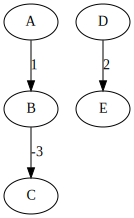

In [58]:
# Disconnected Sections
G4 = Graph()

# Create two disconnected sections
section1 = [Node('A'), Node('B'), Node('C')]
section2 = [Node('D'), Node('E')]

for node in section1:
  G4.addVertex(node)
for node in section2:
  G4.addVertex(node)

# Connect nodes each section
G4.addDiEdge(section1[0], section1[1], 1)
G4.addDiEdge(section1[1], section1[2], -3)
G4.addDiEdge(section1[0], section1[2], 0)
G4.addDiEdge(section2[0], section2[1], 2)

MST = prim(G4, G4.vertices[0]) # Prim

# Print MST
print("Disconnected Components Test ")
for edge in MST:
  print(f"{edge[0].value} - {edge[1].value}")
print()

# Visual Graph
dot = Digraph()

# Add edges to Graph
dot.edge('A', 'B', label='1')
dot.edge('B', 'C', label='-3')

dot.edge('D', 'E', label='2')

dot

Graph with Negative Weights Test 
A - C
A - B



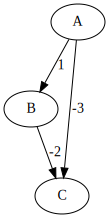

In [59]:
# Graph negative weights
G5 = Graph()

for i in ['A', 'B', 'C']:
  G5.addVertex(Node(i))

V_cycle = G5.vertices
G5.addDiEdge(V_cycle[0], V_cycle[1], 1)
G5.addDiEdge(V_cycle[1], V_cycle[2], -3)
G5.addDiEdge(V_cycle[0], V_cycle[2], -2)

MST = prim(G5, G5.vertices[0]) # Prim

# Print MST
print("Graph with Negative Weights Test ")
for edge in MST:
  print(f"{edge[0].value} - {edge[1].value}")
print()

# Visual Graph
dot = Digraph()

# Add edges to Graph
dot.edge('A', 'B', label='1')
dot.edge('A', 'C', label='-3')
dot.edge('B', 'C', label='-2')

dot

Graph with Negative Weights Test 
A - B
B - C



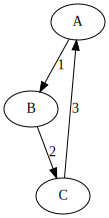

In [60]:
#Graph Cycle
G6 = Graph()

for i in ['A', 'B', 'C']:
  G6 .addVertex(Node(i))

V_cycle = G6.vertices
G6.addDiEdge(V_cycle[0], V_cycle[1], 1)
G6.addDiEdge(V_cycle[1], V_cycle[2], 2)
G6.addDiEdge(V_cycle[2], V_cycle[0], 3)

MST = prim(G6, G6.vertices[0]) # Prim

# Print MST
print("Graph with Negative Weights Test ")
for edge in MST:
  print(f"{edge[0].value} - {edge[1].value}")
print()

# Visual Graph
dot = Digraph()

# Add edges to Graph
dot.edge('A', 'B', label='1')
dot.edge('B', 'C', label='2')
dot.edge('C', 'A', label='3')

dot

Large Graph Test 
A - B
B - C
C - D



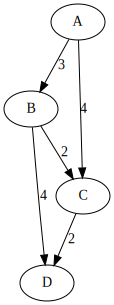

In [69]:
# Complex Graph
G7 = Graph()

for i in ['A', 'B', 'C', 'D']:
  G7.addVertex(Node(i))

V_cycle = G7.vertices
G7.addDiEdge(V_cycle[0], V_cycle[1], 3)
G7.addDiEdge(V_cycle[0], V_cycle[2], 4)
G7.addDiEdge(V_cycle[1], V_cycle[2], 2)
G7.addDiEdge(V_cycle[1], V_cycle[3], 4)
G7.addDiEdge(V_cycle[2], V_cycle[3], 2)

MST = prim(G7, G7.vertices[0]) # Prim

# Print MST
print("Large Graph Test ")
for edge in MST:
  print(f"{edge[0].value} - {edge[1].value}")
print()

# Visual Graph
dot = Digraph()

# Add edges to Graph
dot.edge('A', 'B', label='3')
dot.edge('A', 'C', label='4')
dot.edge('B', 'C', label='2')
dot.edge('B', 'D', label='4')
dot.edge('C', 'D', label='2')
dot

## Time Comparison slowPrim and Prim (Priority Queue)
- Both algorithms find MST (A - C, A - B)
- slowPrim is slower in finding MST then prim algorithm.
- Prim algorithm is more efficient then slowPrim in this case, a larger graph would show a greater time distance.

In [74]:
print("Time Comparison slowPrim and Prim (Priority Queue) - Graph")
# slowPrim
start_time = time.time()
MST1 = slowPrim(G1, G1.vertices[0]) # slowPrim
end_time = time.time()
slowPrime_time = end_time - start_time

# Prim small
start_time = time.time()
MST2 = prim(G1, G1.vertices[0]) # Prim
end_time = time.time()
prim_time = end_time - start_time

print("slowPrim Result")
# Print the MST
for edge in MST1:
  print(f"{edge[0].value} - {edge[1].value}")
print()
print("-" * 40)

print("prim Graph Result ")
# Print the MST
for edge in MST2:
  print(f"{edge[0].value} - {edge[1].value}")
print()
print("-" * 40)

print(f"slowPrim Time: {slowPrime_time:.6f} seconds")
print(f"prim Time: {prim_time:.6f} seconds")
print("-" * 40)

Time Comparison slowPrim and Prim (Priority Queue) - Graph
slowPrim Result
A - B
B - C
B - D

----------------------------------------
prim Graph Result 
A - B
B - C
B - D

----------------------------------------
slowPrim Time: 0.000083 seconds
prim Time: 0.000078 seconds
----------------------------------------


***